In [1]:
import torch
import torch.nn as nn

from models.BiECGNet import BiNet
from utils.DataLoader import Loader
from utils.OpeModel import OpeModel
from utils.Draw import plot_cfm
from utils.Draw import plot_loss_acc
from utils.Draw import Landscape

torch.Size([6192, 1, 3600])
torch.Size([1, 3600])


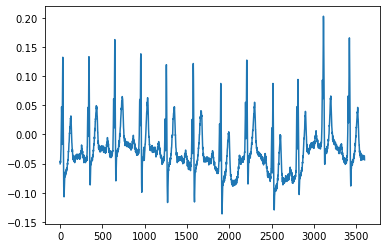

In [3]:
from utils.DataLoader import get_data
import numpy as np
import matplotlib.pyplot as plt

classes, x_train, x_test, y_train, y_test = get_data(5, 0.2, 32)
print(x_train.size())
data = x_train[0]
print(data.size())
time = np.arange(3600)
ecg_signal = data.view((3600))

plt.plot(time, ecg_signal)

In [2]:
model = BiNet(classCount=5)
loader = Loader(classCount=5)

classes, train_loader, test_loader = loader.loader()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
opemodel = OpeModel(model, device, lr=0.001, trLoader=train_loader, teLoader=test_loader)

In [3]:
opemodel.load_state('fbin-p', 95.67, 450, 5)

In [ ]:
opemodel.train_strategy_c(300)

In [ ]:
opemodel.modify_lr(0.0001)
opemodel.train_strategy_c(50)
opemodel.modify_lr(0.00001)
opemodel.train_strategy_c(50)
opemodel.modify_lr(0.000001)
opemodel.train_strategy_c(50)

+-----+-------+-------+-------+-------+
|     |  ACC  |  SEN  |  SPE  |  PPR  |
+-----+-------+-------+-------+-------+
|  F  | 0.992 | 0.467 | 0.997 | 0.636 |
|  N  |  0.97 | 0.986 | 0.937 |  0.97 |
|  Q  | 0.999 |  1.0  | 0.999 | 0.667 |
|  S  | 0.975 | 0.733 |  0.99 | 0.825 |
|  V  | 0.977 | 0.948 | 0.987 | 0.962 |
| SUM | 0.983 | 0.957 | 0.989 | 0.957 |
+-----+-------+-------+-------+-------+


<Figure size 432x288 with 0 Axes>

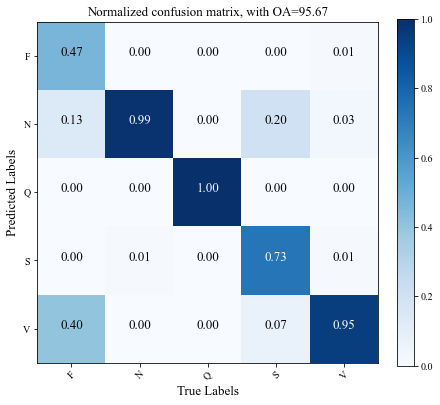

In [4]:
model, acc, loss = opemodel.get_state()
# plot_loss_acc(acc, loss, 'fbin', 450, 5)
plot_cfm(model, test_loader, classes, 'fbin-p', 450, 5)
# opemodel.save_state('fbin', 450)